Summary Statistics:
            Mileage         Age  EngineSize         Price
count    200.000000  200.000000  200.000000  2.000000e+02
mean   53560.560994    9.574377    2.301682  5.391841e+06
std    26540.228806    4.981020    0.768272  2.653647e+06
min    10496.990541    1.086047    1.027094  1.077841e+06
25%    30572.417328    5.444863    1.638801  3.105381e+06
50%    54503.762791   10.207878    2.313499  5.488063e+06
75%    78117.365446   13.617388    3.027787  7.856736e+06
max    98819.824294   17.838587    3.499294  9.922867e+06


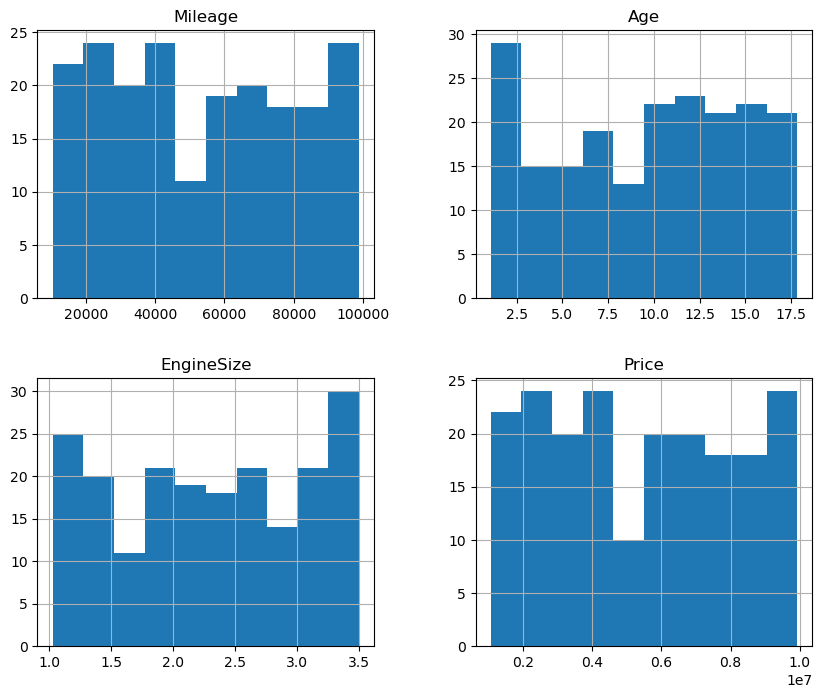

Performance Metrics (StandardScaler):
Mean Squared Error: 17260347.579581715
R-squared: 0.9999975445900573
Performance Metrics (Min-Max Scaler):
Mean Squared Error: 17260347.579583544
R-squared: 0.9999975445900573


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate example data
np.random.seed(42)
n_samples = 200
mileage = np.random.uniform(10000, 100000, n_samples)
age = np.random.uniform(1, 18, n_samples)
engine_size = np.random.uniform(1.0, 3.5, n_samples)
price = 15000 + 100 * mileage + 1000 * age + 5000 * engine_size + np.random.normal(0, 5000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Mileage': mileage,
    'Age': age,
    'EngineSize': engine_size,
    'Price': price
})

# Split data
X = data[['Mileage', 'Age', 'EngineSize']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Load the dataset and display summary statistics
print("Summary Statistics:")
print(data.describe())

# Step 2: Visualize distributions of numerical features
data.hist(figsize=(10, 8))
plt.show()

# Step 3: Implement and compare scaling techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


# Step 5: Normalize the dataset using L2 normalization
X_train_normalized = normalize(X_train, norm='l2')
X_test_normalized = normalize(X_test, norm='l2')

# Step 6: Train a Linear Regression model
model = LinearRegression()

model.fit(X_train_standard, y_train)
y_pred_standard = model.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

model.fit(X_train_minmax, y_train)
y_pred_minmax = model.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

# Step 7: Reflect on model performance
print("Performance Metrics (StandardScaler):")
print("Mean Squared Error:", mse_standard)
print("R-squared:", r2_standard)

print("Performance Metrics (Min-Max Scaler):")
print("Mean Squared Error:", mse_minmax)
print("R-squared:", r2_minmax)